In [1]:
import sys
import argparse

import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd

import glob

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [50]:
PATH_data = '../results/all_tissue/'

In [51]:
samples_path = glob.glob(f'{PATH_data}/*')

In [52]:
# res_dict = {}
c = 0

labels = []
x_pos = []

x_pos1 = []
y_roc_norm = []
y_pr_norm = []
dots_roc_norm = []
dots_pr_norm = []

x_pos2 = []
y_pr_outlines = []
dots_pr_outlines = []
y_roc_outlines = []
dots_roc_outlines = []

x_pos3 = []
y_roc_overlay = []
y_pr_overlay = []
dots_roc_overlay = []
dots_pr_overlay = []

x_pos4 = []
y_roc_flowi = []
y_pr_flowi = []
dots_roc_flowi = []
dots_pr_flowi = []




prop = []

for sample in samples_path:
    
    x_pos.append(c)
    x_pos1.append(c-0.3)
    x_pos2.append(c-0.1)
    x_pos3.append(c+0.1)
    x_pos4.append(c+0.3)
    
    tissue_name = sample.split('/')[-1]
    labels.append(tissue_name)
#     res_dict[tissue_name]=[[],[]]

    sub_samples_path = glob.glob(f'{sample}/*')
#     print (tissue_name)
    
    for sub_folder in sub_samples_path:
        
        sample_name = sub_folder.split('/')[-1]
        df_metrics = pd.read_csv(f'{sub_folder}/results/{sample_name}_metrics.csv', index_col=0)
#         print (df_metrics)
#         print (sample_name)
        if 'flowi' in sample_name:
            y_pr_flowi.append(df_metrics.loc['all','auPR'])
            dots_pr_flowi.append(list(df_metrics.iloc[0:5,3]))
            y_roc_flowi.append(df_metrics.loc['all','auROC'])
            dots_roc_flowi.append(list(df_metrics.iloc[0:5,2]))            
#             print (sample_name, 'flowi')
        if 'overlay' in sample_name:
            y_pr_overlay.append(df_metrics.loc['all','auPR'])
            dots_pr_overlay.append(list(df_metrics.iloc[0:5,3]))
            y_roc_overlay.append(df_metrics.loc['all','auROC'])
            dots_roc_overlay.append(list(df_metrics.iloc[0:5,2]))
#             print (sample_name, 'over')
        if 'outlines' in sample_name:
            y_pr_outlines.append(df_metrics.loc['all','auPR'])
            dots_pr_outlines.append(list(df_metrics.iloc[0:5,3]))
            y_roc_outlines.append(df_metrics.loc['all','auROC'])
            dots_roc_outlines.append(list(df_metrics.iloc[0:5,2]))
#             print (sample_name, 'outl')
        if 'overlay' not in sample_name and 'flowi' not in sample_name and 'outlines' not in sample_name:
            y_pr_norm.append(df_metrics.loc['all','auPR'])
            dots_pr_norm.append(list(df_metrics.iloc[0:5,3]))
            y_roc_norm.append(df_metrics.loc['all','auROC'])
            dots_roc_norm.append(list(df_metrics.iloc[0:5,2]))
#             print (sample_name, 'norm')
        
        with open(f'{sub_folder}/results/{sample_name}_real.pk', 'rb') as real_pi:
                reals = pickle.load(real_pi)
                
#         print (list(reals[0]).count(1)/list(reals[0]).count(0))
                
        prop.append(round(list(reals[0]).count(1)/list(reals[0]).count(0),2))
    
    
    
    c += 1

# prop2 = prop[1::3]
prop2 = prop[1::4]
    
# print(labels)
# print(x_pos)
# print(y_pr)
# print(y_roc)
# print(dots_roc)
# print(dots_pr)  
# print(prop)
        
    

In [53]:
print(len(x_pos3))
print(x_pos3)
print (len(dots_roc_overlay))
print (dots_roc_overlay)
print (prop2)

14
[0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1]
14
[[0.812, 0.773, 0.7979999999999999, 0.812, 0.688], [0.805, 0.644, 0.493, 0.344, 0.64], [0.841, 0.888, 0.934, 0.799, 0.884], [0.619, 0.635, 0.638, 0.684, 0.6679999999999999], [0.597, 0.5479999999999999, 0.6679999999999999, 0.509, 0.47700000000000004], [0.687, 0.855, 0.838, 0.861, 0.644], [0.659, 0.631, 0.535, 0.664, 0.68], [0.691, 0.7490000000000001, 0.773, 0.6679999999999999, 0.47], [0.747, 0.8290000000000001, 0.772, 0.711, 0.632], [0.594, 0.555, 0.579, 0.579, 0.43700000000000006], [0.6629999999999999, 0.7759999999999999, 0.927, 0.8140000000000001, 0.7929999999999999], [0.972, 0.966, 0.9420000000000001, 0.985, 0.9670000000000001], [0.485, 0.607, 0.531, 0.59, 0.54], [0.727, 0.391, 0.542, 0.79, 0.81]]
[0.06, 0.06, 0.06, 0.25, 0.09, 0.03, 0.03, 0.04, 0.03, 0.03, 0.04, 0.2, 0.03, 0.06]


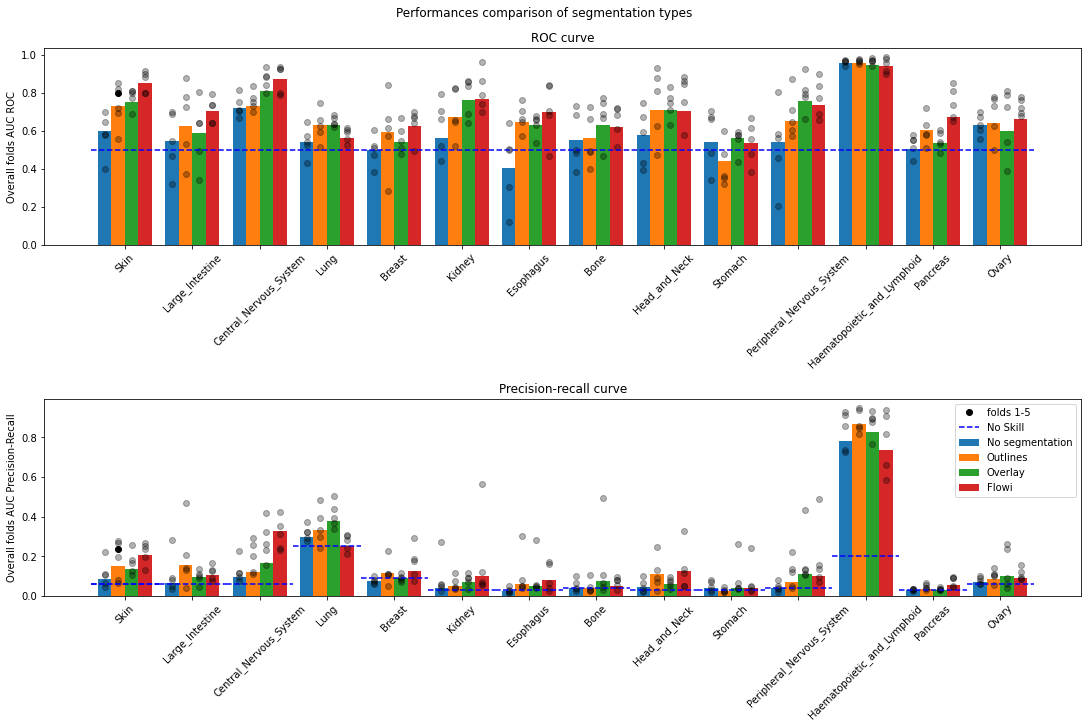

In [54]:
rotation = 45
width = 0.2
alpha = 0.3

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(15,10), constrained_layout=True,)

_ = fig.suptitle(f'Performances comparison of segmentation types')

_ = ax1.set_title('ROC curve')
# _ = ax1.set_xlabel('Tissue')
_ = ax1.set_ylabel('Overall folds AUC ROC')

_ = ax1.bar(x_pos1, y_roc_norm, width=width, label="No segmentation")
_ = ax1.plot(x_pos1, dots_roc_norm, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.bar(x_pos2, y_roc_outlines, width=width, label="Outlines")
_ = ax1.plot(x_pos2, dots_roc_outlines, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.bar(x_pos3, y_roc_overlay, width=width, label="Overlay")
_ = ax1.plot(x_pos3, dots_roc_overlay, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.bar(x_pos4, y_roc_flowi, width=width, label="Flowi")
_ = ax1.plot(x_pos4, dots_roc_flowi, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.plot(x_pos2[0], dots_roc_flowi[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")

_ = ax1.plot([min(x_pos)-0.5, max(x_pos)+0.5], [0.5, 0.5], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax1.set_xticks(x_pos)
_ = ax1.set_xticklabels(labels, rotation=rotation)
# _ = ax1.legend()



_ = ax2.set_title('Precision-recall curve')
# _ = ax2.set_xlabel('Tissue')
_ = ax2.set_ylabel('Overall folds AUC Precision-Recall')

_ = ax2.bar(x_pos1, y_pr_norm, width=width, label="No segmentation")
_ = ax2.plot(x_pos1, dots_pr_norm, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.bar(x_pos2, y_pr_outlines, width=width, label="Outlines")
_ = ax2.plot(x_pos2, dots_pr_outlines, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.bar(x_pos3, y_pr_overlay, width=width, label="Overlay")
_ = ax2.plot(x_pos3, dots_pr_overlay, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.bar(x_pos4, y_pr_flowi, width=width, label="Flowi")
_ = ax2.plot(x_pos4, dots_pr_flowi, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.plot(x_pos2[0], dots_pr_flowi[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")

for i in range(len(x_pos)):
    _ = ax2.plot([x_pos[i]-0.5,x_pos[i]+0.5],[prop2[i],prop2[i]], linestyle='--', color = 'blue')
    
_ = ax2.plot([x_pos[0]-0.5,x_pos[0]+0.5],[prop2[0],prop2[0]], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax2.set_xticks(x_pos)
_ = ax2.set_xticklabels(labels, rotation=rotation)
_ = ax2.legend()


plt.savefig(f'Performances_comparison_segmentation_types.png')